<a href="https://colab.research.google.com/github/jpatrickweller/Time-Series-Analysis/blob/master/STL_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seasonal Trend Decomposition using LOESS (STL)

In [1]:
# The STL module didn't open, so this comes from stackoverflow
!pip install git+https://github.com/statsmodels/statsmodels.git

  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-0eh27jxt
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-0eh27jxt
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.13.0.dev0+220.ga91eea017-cp37-cp37m-linux_x86_64.whl size=17992145 sha256=077041939ef938af01e0a44a90787018c532f3528224c9990a0c1e912416e24e
  Stored in directory: /tmp/pip-ephem-wheel-cache-8hytauv1/wheels/7b/bd/6d/3192a61f34609bda0eea70342907984dba2ad17c3abb502ce7
Successfully built statsmodels


In [2]:
# Bring in the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

register_matplotlib_converters()

In [10]:
# Going to look at google trends data for searches for "ice cream"

url = 'https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream_interest.csv'
df = pd.read_csv(url)
df.set_index(keys='month', inplace=True)
ic_df = df.asfreq(pd.infer_freq(df.index))
ic_df

,interest
month,
2004-01-01,13
2004-02-01,15
2004-03-01,17
2004-04-01,19
2004-05-01,22
...,...
2020-04-01,55
2020-05-01,71
2020-06-01,81


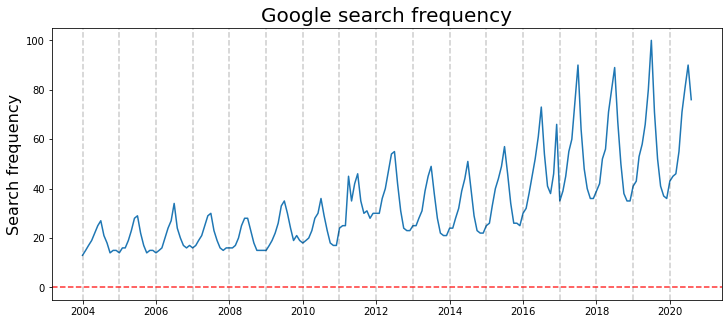

In [57]:
def make_year_marks(observations):
    for year in observations.index.year.unique():
        x_val = pd.to_datetime(str(year) + '-01-01')
        plt.axvline(x=x_val, linestyle='--', color='k', alpha=.2)

def plot_ts(observations):

    plt.figure(figsize=(12,5))
    plt.title('Google search frequency', fontsize=20)
    plt.plot(observations.interest)

    make_year_marks(observations)
    plt.ylabel("Search frequency", fontsize=16)
    plt.axhline(y=0, linestyle='--', color='r', alpha=.8)
    plt.show()

plot_ts(ic_df)

In [ ]:
# Ok, some weird stuff in there. Double spike in 2011. Weird winter spike in 2016.
# Steady 2004 - 2010, then upward trend and increased variance.

# Perform STL Decomp

In [14]:
stl = STL(ic_df)
stl_fit = stl.fit()
seasonal, trend, resid = stl_fit.seasonal, stl_fit.trend, stl_fit.resid

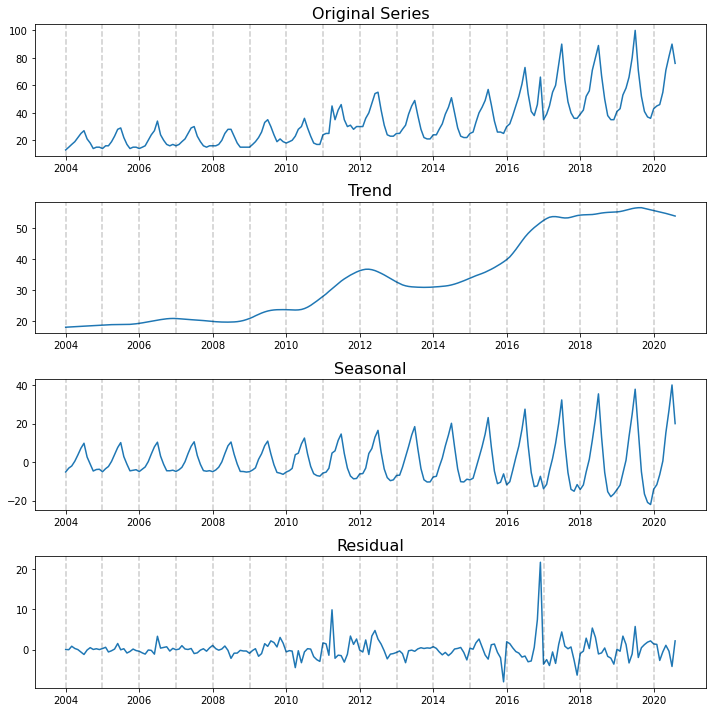

In [59]:
# Plot them out

plt.figure(figsize=(10,10))

# Original TS
plt.subplot(4,1,1)
plt.plot(ic_df)
plt.title('Original Series', fontsize=16)
make_year_marks(ic_df)

# Trend
plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)
make_year_marks(trend)

# Seasonal
plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title("Seasonal", fontsize=16)
make_year_marks(seasonal)

# Residuals
plt.subplot(4,1,4)
plt.plot(resid)
plt.title("Residual", fontsize=16)
make_year_marks(resid)

plt.tight_layout()

[]

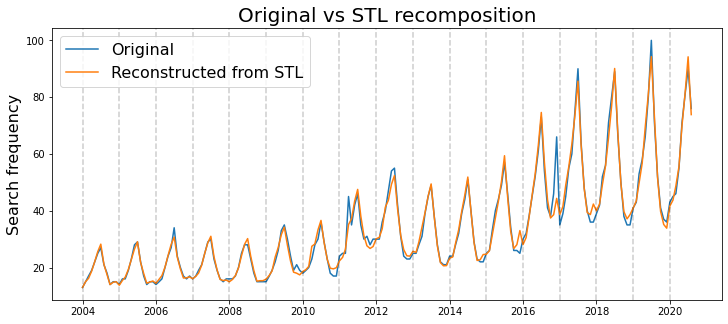

In [60]:
# STL decomposes a timeseries into 2 components, the trend and seasonal.
# Let's plot them against each other.

estimated = trend + seasonal # literally this simple!

plt.figure(figsize=(12,5))
plt.plot(ic_df, label='Original')
plt.plot(estimated, label='Reconstructed from STL')
plt.legend(loc='best', fontsize=16)
plt.ylabel("Search frequency", fontsize=16)
plt.title("Original vs STL recomposition", fontsize=20)
make_year_marks(ic_df)
plt.plot()


In [28]:
# The anomalies clearly stand out in the original series. Let's detect them!

# Anomaly Detection

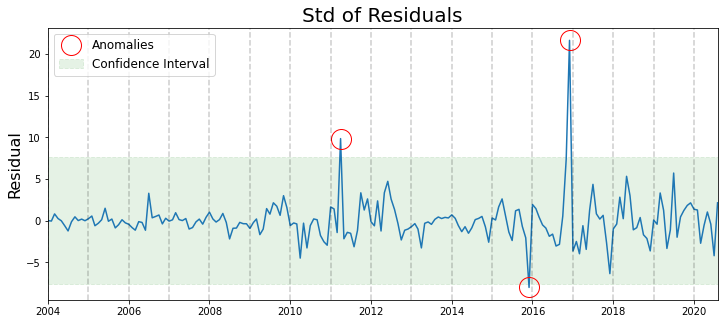

In [61]:
# Identify values more than 3 std away
lower_bound = resid.mean() - 3*resid.std()
upper_bound = resid.mean() + 3*resid.std()
anom_resid = resid[(resid<lower_bound) | (resid>upper_bound)]

# Plotem!
plt.figure(figsize=(12,5))
plt.plot(resid)

# Plot the condience interval
plt.fill_between(x=[resid.index[0], resid.index[-1]], y1=lower_bound, y2=upper_bound, 
                color='g',
                linestyle='--',
                alpha=.1,
                label='Confidence Interval')

# Circle the anomalies
plt.plot(anom_resid, linestyle='None', 
        marker='o', markerfacecolor='None', 
        markeredgecolor='r', markersize=20,
        label='Anomalies')

# Axis stuff
make_year_marks(ic_df)
plt.title("Std of Residuals", fontsize=20)
plt.legend(loc='best', fontsize=12)
plt.ylabel("Residual", fontsize=16)
plt.xlim(resid.index[0], resid.index[-1])

plt.show()

In [62]:
# Searching google for ice cream in dec 2016, we find a controversy about "ice cream is gay" lolol
